# Pre-Modeling: Data Preprocessing

## Aim
Pre-modeling<br>
Framing the problem <br>  Selecting most suitable model<br> Evaluating the model through performance measures<br>Validatig the model

## Python Libraries
Numpy<br>
Pandas<br>
Sci-kit learn<br>
Matplotlib<br>


## Dataset
Dataset is based on data from the 1990 California census. Given data shows that it has been collected by observing many subjects at the same point of time, or without regard to differences in time.Hence, we have a cross-sectional data at hand. Analysis of cross-sectional data usually consists of comparing the differences among the subjects.<br>
Source of 'housing' dataset: https://www.kaggle.com/harrywang/housing

## Problem Statement
Our task is to predict median house values in Californian districts, given a number of features from these districts. <br>

A description of variables:<br>

1. longitude: A measure of how far west a house is; a higher value is farther west<br>
2. latitude: A measure of how far north a house is; a higher value is farther north<br>
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building<br>
4. totalRooms: Total number of rooms within a block<br>
5. totalBedrooms: Total number of bedrooms within a block<br>
6. population: Total number of people residing within a block<br>
7. households: Total number of households, a group of people residing within a home unit, for a block<br>
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)<br>
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)<br>
10. oceanProximity: Location of the house w.r.t ocean/sea<br>

# Introduce the Data

## First importing key libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
df=pd.read_csv('housing.csv')

In [82]:
df.head() # Showing 1st five rows'value by default

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Looking at this seems that we have all variables as numerical. Only "ocean_proximity" is categorical variable.
As we are interested in housing price so, "median_house_value" is variable of our interest. In econometrics, we call it dependent variable and is denoted as "y".

In [ ]:
df.tail() # giving us last five rows'value

## Getting to know data

In [ ]:
df.shape

We have ten columns.Hence, There are 10 attributes: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value and ocean_proximity.
Note that index column is not included in it. We may include index by using set_index if needed. For now, we ll keep it like that
There 20640 rows representing district data. 

In [ ]:
# The info() method is useful to get a quick description of the data
# in particular the total number of rows,
# and each attribute’s type and number of non-null values

df.info()

As we have seen by shape that there are 20640 data points in our dataset. All variables have given number. Only "total_bedroom" has 20433. So, there are missing values. We need to address this problem.
But, first we will finish our data learning process.

In [ ]:
# Let's look at the other fields.
# The describe() method shows a summary of the numerical attributes

df.describe()

Notice only numerical attributes are there. So, "ocean_proximity" is not there.
25%, 50%, 75% shows the corresponding percentiles
Points to Note:
25th percentile is called 1st quartile - 25% of the districts have a housing_median_age lower than 18.
50th percentile is called median - 50% of the districts have a housing_median_age lower than 29.
75th percentile is called 3rd quartile - 75% of the districts have a housing_median_age lower than 37.<br>
Check about mean and standard deviation. Mean shows average value while Standard deviation is a number used to tell how measurements for a group are spread out from the average (mean), or expected value.<br> A low standard deviation means that most of the numbers are very close to the average. A high standard deviation means that the numbers are spread out.

In [ ]:
# wE can also take transverse of this function
df.describe().T

In [ ]:
# We can check individual attributes as well
df.housing_median_age.head()

In [ ]:
#Suppose we want to see any particular values at given data point then we can get that data by row number using iloc[]
df.housing_median_age.iloc[20638]


In [ ]:
#We didnt see what our categorical variable contains
#Find out what categories exist
# and how many districts belong to each category by using the value_counts() method

df["ocean_proximity"].head()

In [ ]:
#It only shows 1st five values and we want to see how many more categories except of NEAR BAY we have at hand
df['ocean_proximity'].value_counts().sort_values(ascending=False).head()
#df["ocean_proximity"].value_counts()

We can see we have 5 categories and how they are divided in dataset.

# Distribution of Features
- A histogram is a simple representation of the distribution of values for a given feature


- X-axis represents value bins and y-axis represents the frequency of an observation falling into that bin


- It is also interesting to look at distributions broken up by outcome categories

In [ ]:
# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres. Histogram is frequency of data within certain range.

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

 **About the histogram:**   
 A histogram is used for continuous data, where the bins represent ranges of data.To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable

**About Results:**  
From above histograms it's clear that most of the features are skewed. It seems that **'housing_median_age'** and **'median_housing_value'** have been capped a the end (Peak at the end).
We can also see that 'population','total_bedrooms','total_rooms' are **right skewed** meaning that there is big tail on right side. We need to transform this tail based data to bell shaped distribution i.e normal distribution. 

## Dummy Variable
stepwise<br> 1-pd.get_dummies(df.ocean_proximity) # creates one column for every possible value<br>
2-As dummy variables can one as standard category i.e base and rest as category by number. E.g is we have 5 categories. Then we will one category as base. K-1 and we ll have 4 categories to make comparison <br>
3-pd.get_dummies(df.ocean_proximity).iloc[:,1:] .....meaning all rows and takes column from 10.<br>
4-pd.get_dummies(df.ocean_proximity,prefix='ocean_proximity').iloc[:,1:].....it adds prefix<br>
5-ocean_proximity_dummy=pd.get_dummies(df.ocean_proximity,prefix='ocean_proximity').iloc[:,1:]<br>
6-df(overwrite)=pd.concat([df,ocean_proximity_dummy ],axis=1)..........axis=0 for row, axis =1 for column<br>

In [52]:
pd.get_dummies(df.ocean_proximity) # creates one column for every possible value

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


In [5]:
type('ocean_proximity')

str

In [53]:
pd.get_dummies(df.ocean_proximity).iloc[:,1:]

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0


In [54]:
pd.get_dummies(df.ocean_proximity,prefix='ocean_proximity').iloc[:,1:]

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0


In [55]:
pd.get_dummies(df.ocean_proximity,prefix='ocean_proximity').iloc[:,1:]

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0


In [56]:
ocean_proximity_dummy=pd.get_dummies(df.ocean_proximity,prefix='ocean_proximity').iloc[:,1:]

In [57]:
# Doing in steps. But this is our final step.
df=pd.concat([df,ocean_proximity_dummy ],axis=1) # axis=0 means row, axis=1 means column

In [58]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,1,0


**But we are passing dummy values to ocean_proximity_dummy as series. There is a way to do it by dataframe. Let's reset back to original df 

In [159]:
df=pd.read_csv('housing.csv')

In [160]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [161]:
df.shape

(20640, 10)

In [162]:
# Lets use alternative way
pd.get_dummies(df,columns=['ocean_proximity']).head() # if we have multiple columns then use em with coma

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [163]:
#If we want to use k-1 approach to keep base category
df=pd.get_dummies(df,columns=['ocean_proximity'], drop_first=True)

In [164]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [165]:
df.shape

(20640, 13)

# Don't Forget missing values

In [89]:
#Remember?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                     20640 non-null float64
latitude                      20640 non-null float64
housing_median_age            20640 non-null float64
total_rooms                   20640 non-null float64
total_bedrooms                20433 non-null float64
population                    20640 non-null float64
households                    20640 non-null float64
median_income                 20640 non-null float64
median_house_value            20640 non-null float64
ocean_proximity_INLAND        20640 non-null uint8
ocean_proximity_ISLAND        20640 non-null uint8
ocean_proximity_NEAR BAY      20640 non-null uint8
ocean_proximity_NEAR OCEAN    20640 non-null uint8
dtypes: float64(9), uint8(4)
memory usage: 1.5 MB


"total_bedrooms" has missing data.So, we need to deal with it. Also, its histogram shows that this variable might need further treatment. For now, we are not sure if this skewed trend is due to missing values or what else. 

In [90]:
df[df.isnull().any(axis=1)].head() # using isnull() function

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,0,0,1,0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,0,0,1,0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,0,0,1,0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,0,0,1,0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,0,0,1,0


Good thing is that we can see what are the data points where our variable has missing values. So, we do not need to inspect null values at random. As we know the points and places where there are missing values, it is much easier to address the problem.

## Alternative and efficient way of checking missing values

In [ ]:
# We will use "missingno" but, we need to install that 1st.
!conda install -c conda-forge pandas-profiling -y 

!pip install missingno

In [91]:
import missingno as msno

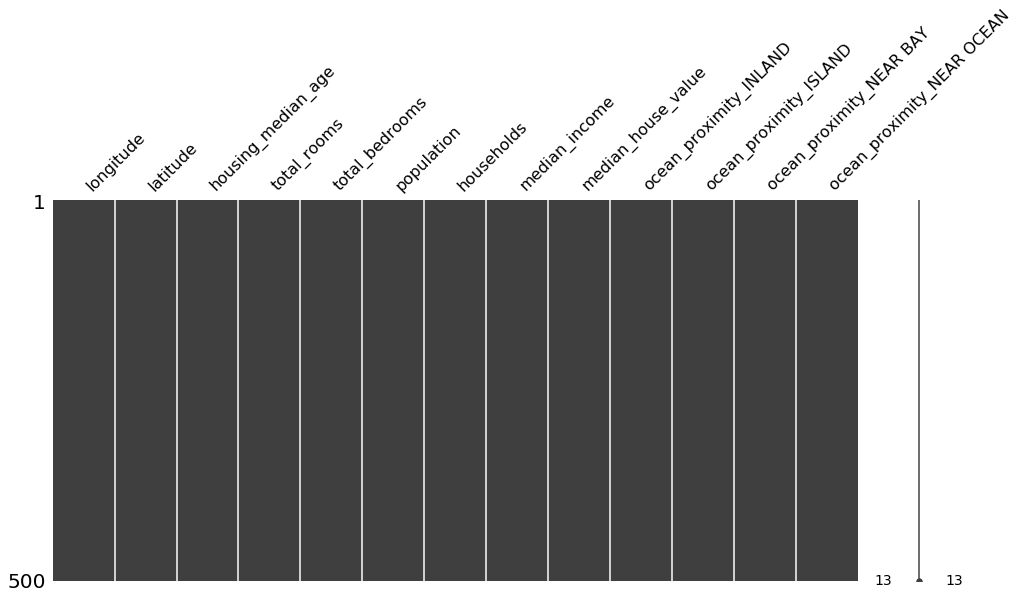

In [92]:
msno.matrix(df2.sample(500),
            figsize=(16, 7),
            width_ratios=(15, 1))

In top 500 values, we see there are traces of white lines in variable total_bedrooms. Other variables are fully black and hence they show no sign of missing data. lets check for higher values.

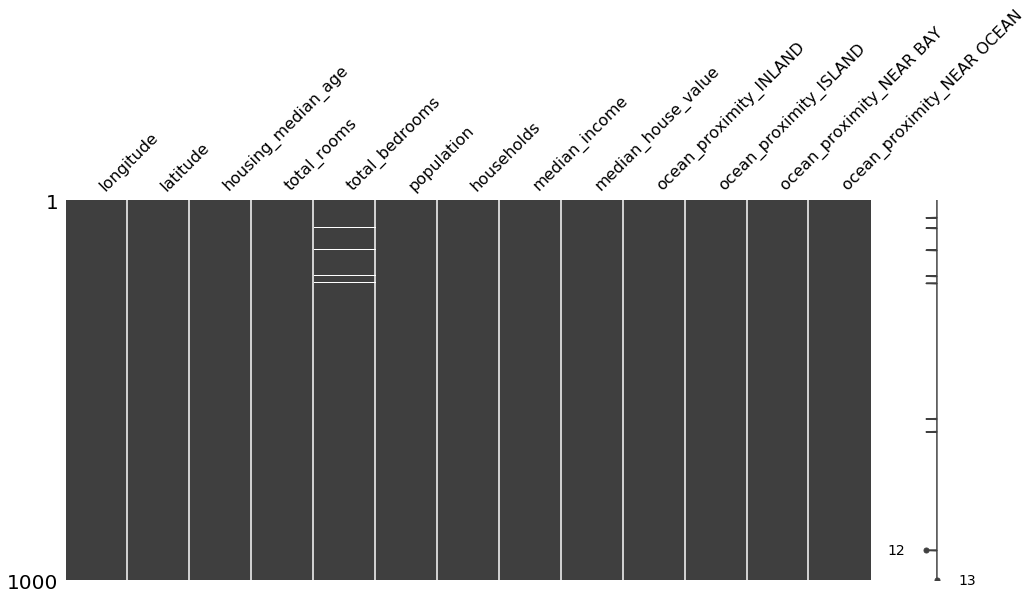

In [70]:
msno.matrix(df2.sample(1000),
            figsize=(16, 7),
            width_ratios=(15, 1))

We see more of white strips. This shows how frequent these missing points are. They are not concentrated atleast for 1st 1000 values of total_bedrooms. 

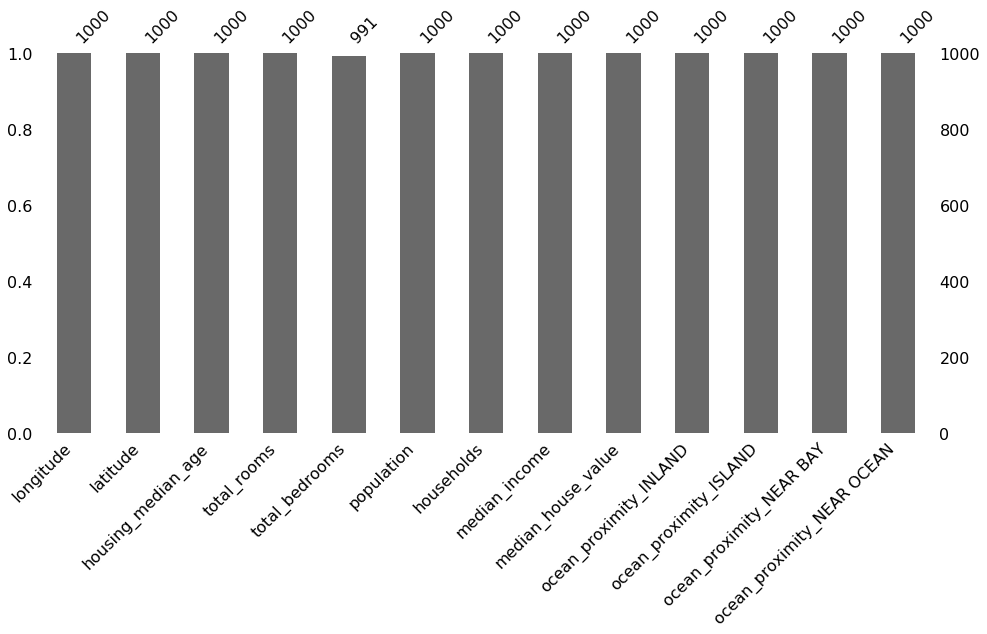

In [71]:
msno.bar(df2.sample(1000),
            figsize=(16, 7),)

Out of 1000 values , we get 986 values of "total_bedrooms". It confirms more and more. Not only that, it visually make it easier to check all variables. In this data, we do not have huge problem of missing data as only one is under consideration since we run info()

In [ ]:
#msno.heatmap(df.sample(1000),
            #figsize=(16, 7),)
# This is useful when we want to see correlation between missing values of different variable. It wont work here as we have only 
# one infected variable

In [166]:
print("All variables:", len(df))
print("total_bedrooms_with_nulls:", len(df[(df.total_bedrooms.isnull())]))

All variables: 20640
total_bedrooms_with_nulls: 207


### Treatment of Missing values

There are three ways to solve this problem. None of them is perfect. They might suit according to dataset and problem statement.<br>
**Solution 1:**<br>
Get rid of those districts where total_bedrooms has missing values i.e rows <br>
Use function dropna()<br>

In [ ]:
data_option1=df.dropna(subset=["total_bedrooms"])
data_option1

In [ ]:
data_option1.info()

As a result of dropna(), we have zero missing values now. so our data with null values is empty. We could use this on our further analysis. For this analysis, it makes sense as there was only one variable. However; this might not be a good solution in a situation where two or more variables have missing values. Additionally, their location at data points might be different so removing one row means that we will remove some useful and valid value of other variable.

**Solution 2**<br> Get rid of whole attribute i.e column of total_bedrooms Use drop()

In [ ]:
data_option2=df.drop("total_bedrooms", axis=1)
data_option2.head()

As we have removed entire column, so there is no missing value. But, this might be even worse as we have lost an entire attribute and all those values might be useful.This may effect our analysis later. So, we need a better solution instead of removing these values. We rather wish to keep rows or columns.

**Solution 3**<br> Set given values with missing data with some values(zero, mean, median)<br> Use fillna()<br>
We will use impute though which is better and more efficient in case of more than one variable

In [ ]:
#median = df["total_bedrooms"].median()
#median

In [ ]:
#df["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
#df.info()

We have all values and only we treated one variable. By removing those missing values might impact our analysis because other variables will have all of their values, Or we remove their row values too. That won't make much sense.Again, these solution depends on data we have.

In [ ]:
#df.hist(column='total_bedrooms',bins=30)

Although we have got rid of missing values yet we have still issue of skewedness.

**Treating whole dataset:** Sometimes we have more than one variable with missing values. In that case, we do not waste time in removing values of all features(columns). So, we treat all dataset at the same time. Those with no null value would remain same and we will make an efficient and time saving coding habit

In [ ]:
# As we wanto use impute technique so lets Give new name to our original df. Just to keep all changes we have done on "df"
#df=pd.read_csv('housing.csv')

In [ ]:
# Assign X as a DataFrame of features and y as a Series of the outcome variable. y as series because it ocean proxmity
#contain categorical values. So we cannot imput that and it does not contain any missing value as well. 
#x = df2.drop('median_house_value', 1)
#y = df2.median_house_value

**Do not confuse y_test as being dependant varaible**. We have used two notations for division of our data.Our dependant variable is 'median_house_value'.And 'ocean_proximity' is just another variable. As it is categorical variable so, we have separated it from numerical value. <br>

In [ ]:
#x.head()

In [ ]:
#x.info()

In [ ]:
#type(x)

Check we have missing values in our given variable. So instead of treating one variable, we will do it on all.

In [ ]:
#y.shape

In [ ]:
#y.head()

In [ ]:
#type(y)

In [ ]:
df.head()

**Notice y is series while x is dataframe. So, why does not have any feature name. We can do it by ourselves**

In [167]:
#Imputer to replace Null with mean
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy='mean', axis=0)

In [168]:
imp.fit(df)
df = pd.DataFrame(data=imp.transform(df), columns=df.columns)

In [169]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude                     20640 non-null float64
latitude                      20640 non-null float64
housing_median_age            20640 non-null float64
total_rooms                   20640 non-null float64
total_bedrooms                20640 non-null float64
population                    20640 non-null float64
households                    20640 non-null float64
median_income                 20640 non-null float64
median_house_value            20640 non-null float64
ocean_proximity_INLAND        20640 non-null float64
ocean_proximity_ISLAND        20640 non-null float64
ocean_proximity_NEAR BAY      20640 non-null float64
ocean_proximity_NEAR OCEAN    20640 non-null float64
dtypes: float64(13)
memory usage: 2.0 MB


# Visualization: Checking relationship between variables

Visualizing is best way to see relationship between variables.

## Sactter Plot

Text(0.5,1,'Distribution of households')

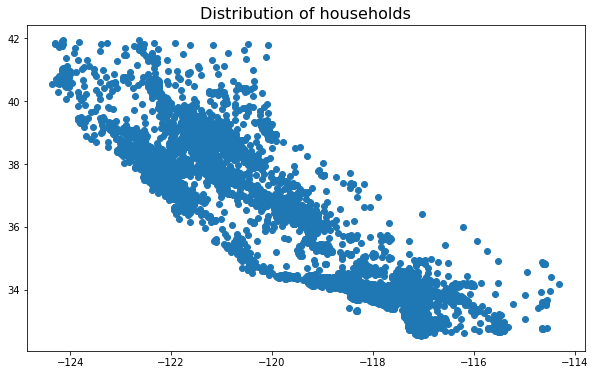

In [171]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['longitude'],y=df['latitude'])
plt.title("Distribution of households",size=16)

Text(0.5,1,'Distribution of households')

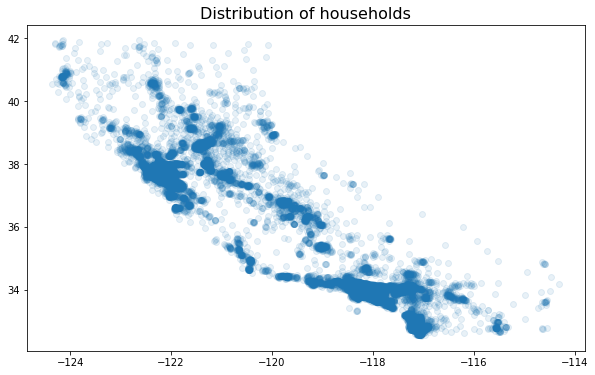

In [172]:
#If we want to see density of data points then we can set alpha=0.1
plt.figure(figsize=(10,6))
plt.scatter(x=df['longitude'],y=df['latitude'],alpha=0.1)
plt.title("Distribution of households",size=16)

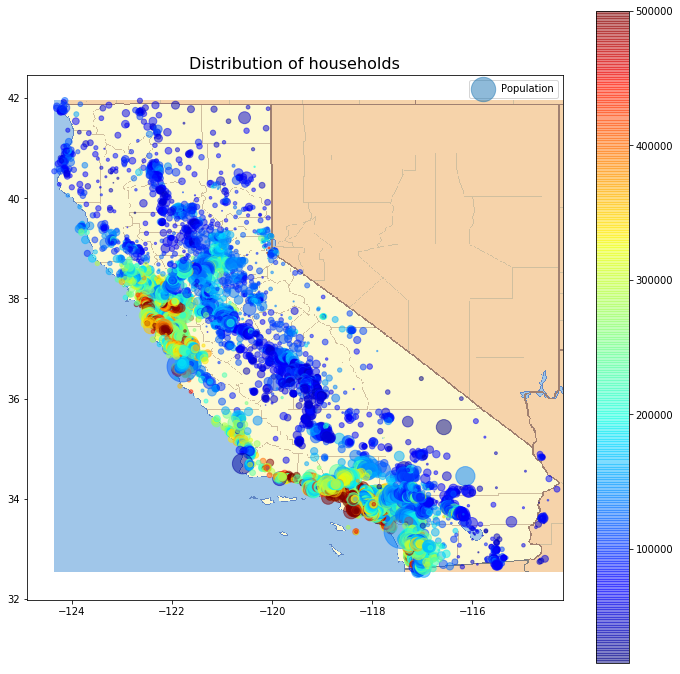

In [173]:
plt.figure(figsize=(12,12))
img=plt.imread('California.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])
#s : scalar or array_like, shape (n, ), optional
# : color, sequence, or sequence of color, optional, default: 'b
plt.scatter(x=df['longitude'],y=df['latitude'],alpha=0.5,s=df['population']/30,c=df['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

As our dependent variable is housing_value. So check it with lattitude, longitude and also with population. Clearly location and population show interesting inferential analysis. <br>
1-If we see house_value goes lower to higher as it goes blue from red. We can see that places that are close to sea have higher prices especially in Central-West and West-South part shown by red dots. It is worth mentioning that house_value is lower in north as shown by couple of blue dots and only few light green ones.



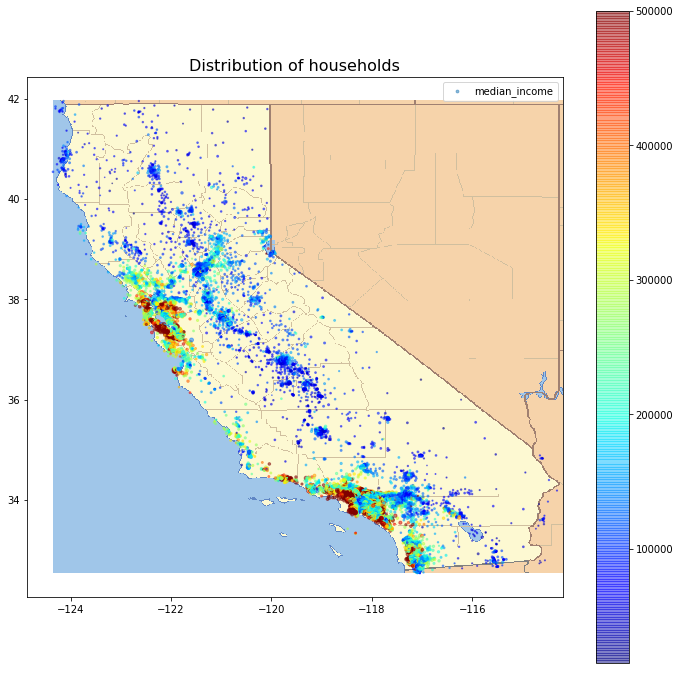

In [174]:
plt.figure(figsize=(12,12))
img=plt.imread('California.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])
#s : scalar or array_like, shape (n, ), optional
# : color, sequence, or sequence of color, optional, default: 'b
plt.scatter(x=df['longitude'],y=df['latitude'],alpha=0.5,s=df['median_income'],c=df['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='median_income')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()

This graph confirms our assumption. As those who have higher median_income can afford to have higher value_house so they tend to live near sea in above mentioned zones. We have a distribution of income in certain areas whereas other areas look almost empty. It can be assumed that money begets money.<br> Those places which have well-off people have a higher median_income neighbourhood. And they are clustered with this pattern. Those with lower income not only tend to go towards areas with low house value but, they tend to cluster around community of same social status

## Correlation matrix

In [175]:
corr_matrix=df.corr()

In [176]:
# Finding relation of our dependant variable with others. 
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049454
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

house value has 1 value with its own value. With other variable, we do not see very high correlation. Only 69 %, 13% or 10% are of any significance. In fact, population is negatively related with house value meaning higher the value, lower will be population.<br> It makes sense as people tend to move from richer neighbourhood if they cannot afford.
Number of rooms and age of house are also reasonable with house value. 

## Pairplot

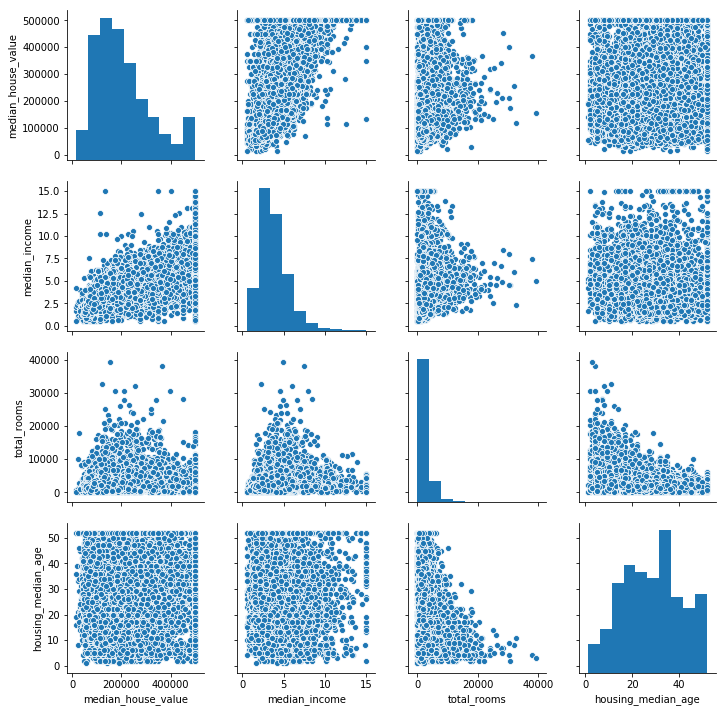

In [177]:
#using seaborn now for pairplot
sns.pairplot(df[['median_house_value','median_income','total_rooms','housing_median_age']])

Diagnal plot is of variable with its own value. Rest are with variables. We tend to find some pattern whether positive or negative. As we have seen income from above correlation, we expect income to have relation with house value.In the end of x-axis we observe an accumulation. Similary, we observe some caps in housing median age. Total_rooms does not make much sense from this. <br>Hence, we cannot say that those values were actually higher enough to draw any relationship. Still, we ll keep these variable in mind.

### Scatter plot between two features

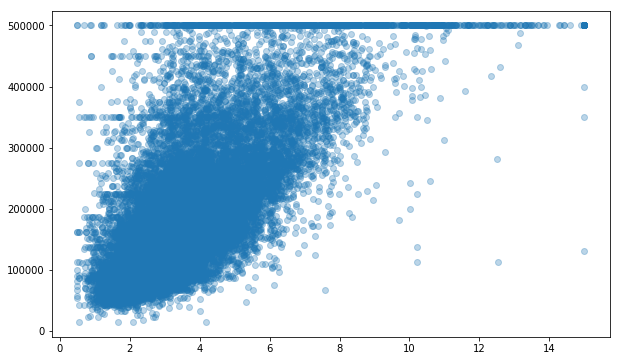

In [178]:
#Lets see more closely for only house value and median income

plt.figure(figsize=(10,6))
plt.scatter(y=df['median_house_value'],x=df['median_income'],alpha=0.3)

As noted above, a clear line can be seen at 500k at which the data is capped.another is 450, 350 and even slight hint down at 250k. But what's wrong with capped data? This kind of data may degrade the performance of model.<br>
Values of all other elements should be uniformly increased. This hints to outlier problem in our data. 

# Problem of Outliers
- An outlier is an observation that deviates drastically from other observations in a dataset


- Occurrence:
    - Natural, e.g. Mark Zuckerberg's income
    - Error, e.g. human weight of 2,000 lb. due to mistyping extra 0


- Why are they problematic?
    - Naturally occuring:
        - Not necessarily problematic
        - But can skew your model by affecting the slope (see image below)
    - Error 
        - Indicative of data quality issues
        - Treat in the same way as a missing value, i.e. use imputation
   
   
- Many, many approaches for detecting outliers; we will discuss two of these:
    - Tukey IQR
    - Kernel density estimatation

In [179]:
df['median_house_value'].max()

500001.0

In [180]:
df['median_house_value'].min()

14999.0

Check how big is this difference in minimum and maximum. This creates gap in median income variable so high that we had possibility of outlier

In [181]:
df['median_house_value'].mean()

206855.81690891474

In [182]:
df['median_house_value'].std()

115395.6158744132

Again check this huge difference in std deviation and mean. 

In [183]:
df[(df['median_house_value'] > 400000.0)].count()

longitude                     1744
latitude                      1744
housing_median_age            1744
total_rooms                   1744
total_bedrooms                1744
population                    1744
households                    1744
median_income                 1744
median_house_value            1744
ocean_proximity_INLAND        1744
ocean_proximity_ISLAND        1744
ocean_proximity_NEAR BAY      1744
ocean_proximity_NEAR OCEAN    1744
dtype: int64

In [184]:
df[(df['median_house_value'] > 500000.0)].count()

longitude                     965
latitude                      965
housing_median_age            965
total_rooms                   965
total_bedrooms                965
population                    965
households                    965
median_income                 965
median_house_value            965
ocean_proximity_INLAND        965
ocean_proximity_ISLAND        965
ocean_proximity_NEAR BAY      965
ocean_proximity_NEAR OCEAN    965
dtype: int64

We see 50 K and 40 K are so much above mean and still there are so many values at that higher range meaning house value is too high.

## Visualization is key to understand outliers

### Histogram

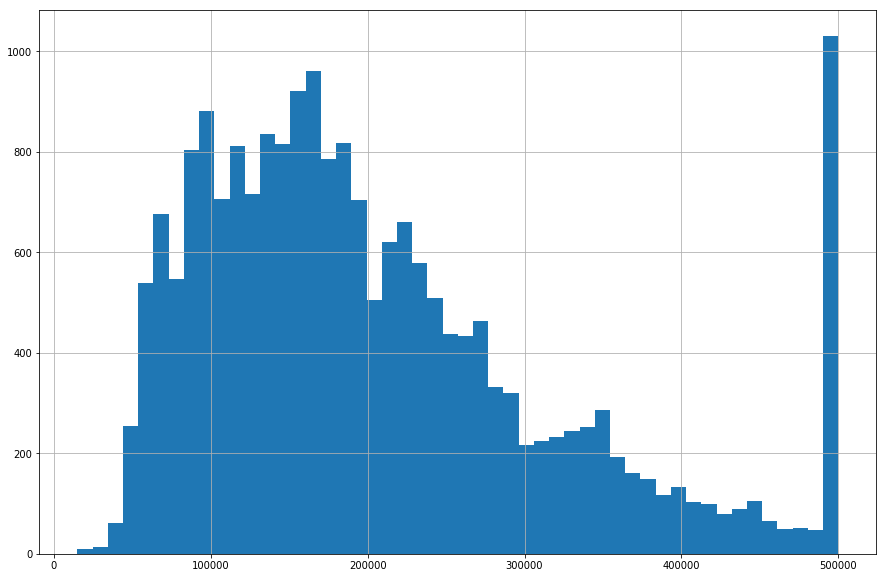

In [185]:
df.median_house_value.hist(bins=50,figsize=(15,10))

### Density Plot

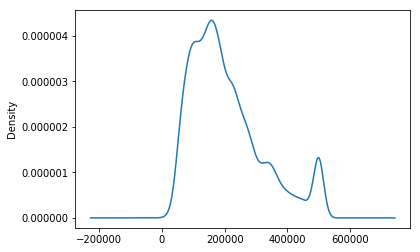

In [186]:
df.median_house_value.plot(kind='density')

We can see a Gaussian bell curve at each data point.each small black vertical line on the x-axis represents a data point
blue curve is created by summing the individual Gaussians and forms the overall density plot.<br>
The x-axis is the value of the variable just like in a histogram. y-axis in a density plot is the probability density function for the kernel density estimation.this is a probability density and not a probability.<br> The difference is the probability density is the probability per unit on the x-axis. To convert to an actual probability, we need to find the area under the curve for a specific interval on the x-axis

In simpler words, plot like histogram inconsist distribution of data. We can see a high peak in centre. That indicates central point i.e mean. We can another jump in data near 500001.0. This is where we saw peak values and then plot falls towards zero meaning there are no values after that.

### Boxplot

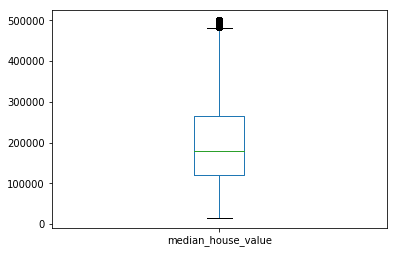

In [187]:
df.median_house_value.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

Mean value is shown i.e 207194. We can see how asymmertric this plot is. It is more concentrated bottom side. Another key is shown at vertical axis as 500001.0 value. It is that capped value.

So, we can finally see problem of capped data.These capped data point are called **outlier**. Enough of proof of their existance, lets see what are they

## Detecting Outliers

### Tukey IQR
- Identifies extreme values in data


- Outliers are defined as:
    - Values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)
 
 
- Standard deviation from the mean is another common method to detect extreme values
    - But it can be problematic:
        - Assumes normality 
        - Sensitive to very extreme values

In [190]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [191]:
tukey_indices, tukey_values = find_outliers_tukey(df['median_house_value'])
print(np.sort(tukey_values))

[482700. 482900. 483100. ... 500001. 500001. 500001.]


There we have our list of outlier values.

In [192]:
df["median_house_value"].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
225000.0     92
350000.0     79
87500.0      78
275000.0     65
150000.0     64
175000.0     63
100000.0     62
125000.0     56
67500.0      55
250000.0     47
200000.0     46
118800.0     39
450000.0     37
156300.0     35
212500.0     33
193800.0     31
181300.0     31
300000.0     30
75000.0      30
81300.0      29
55000.0      29
93800.0      29
106300.0     28
143800.0     28
400000.0     27
           ... 
373500.0      1
433000.0      1
354600.0      1
389700.0      1
370100.0      1
304200.0      1
477200.0      1
422500.0      1
445900.0      1
309000.0      1
413100.0      1
465700.0      1
353700.0      1
438900.0      1
396700.0      1
380300.0      1
478500.0      1
455300.0      1
403000.0      1
363900.0      1
494400.0      1
389800.0      1
347500.0      1
487000.0      1
331100.0      1
303200.0      1
307900.0      1
383200.0      1
360800.0      1
405500.0      1
Name: median_house_value

On checking value count, we may find that '500001.0' the leading outlier has occured 786 times.

### Outlier detection - Kernel Density Estimation
- Non-parametric way to estimate the probability density function of a given feature


- Can be advantageous compared to extreme value detection (e.g. Tukey IQR)
    - Capures outliers in bimodal distributions

In [193]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]

    return outlier_ind, outlier_value

In [194]:
kde_indices, kde_values = find_outliers_kde(df['median_house_value'])
print(np.sort(kde_values))

C:\Users\Humza\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[ 14999.  14999.  14999.  14999.  17500.  22500.  22500.  22500.  22500.
  25000.  26600.  26900.  27500.  28300.  30000.  30000. 439300. 439800.
 439900. 440000. 440100. 440300. 440500. 440900. 440900. 440900. 441000.
 441100. 441100. 441400. 441400. 441700. 441700. 441900. 442000. 442100.
 442100. 442100. 442100. 442500. 442700. 442900. 442900. 442900. 443000.
 443300. 443300. 443600. 443600. 443800. 443800. 443800. 443900. 444000.
 444100. 444100. 444200. 444300. 444400. 444500. 444500. 444700. 445000.
 445200. 445400. 445600. 445700. 445700. 445900. 446000. 446100. 446200.
 446200. 446400. 446600. 446600. 446600. 446700. 446800. 446800. 446900.
 447100. 447300. 447400. 447400. 447700. 448100. 448300. 450000. 450000.
 450000. 450000. 450000. 450000. 450000. 450000. 450000. 450000. 450000.
 450000. 450000. 450000. 450000. 450000. 450000. 450000. 450000. 450000.
 450000. 450000. 450000. 450000. 450000. 450000. 450000. 450000. 450000.
 450000. 450000. 450000. 450000. 450000. 450000. 45

**Note:**<br>
Notice how two methods are different. We can see that '500001.0' is shown with Tukey IQR because that method takes extreme values while Kernel density function works with pdf(probability density function). So, it does not show '500001.0'.<br>
A common misconception is that outliers are always bad for data. Actually, it depends on data and your problem statement. If you are solving a fraud detection problem then your outliers could be problemetic hence, they can be considered bad.<br>
On other side, if you are working with a problem where you are comparing salaries of CEO then your outliers could be those CEOs who are under 30 and earn in six digit.So, it is important to see how outliers impact your problem statement and treat them accordingly.<br>
We can keep them or remove(as we did with missing values) them<br>
**Reading** :<br> https://conversionxl.com/blog/outliers/

**Before we detect and find treatment of outliers. It's right time to divide dataset into training and test set. Reason is once data is scaled then validation of results might be challenging.** 

In [152]:
# Assign X as a DataFrame of features and y as a Series of the outcome variable
x = df.drop('median_house_value', 1)
y = df.median_house_value

In [153]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,1.0,0.0


In [154]:
type(x)

pandas.core.frame.DataFrame

In [155]:
x.shape

(20640, 12)

In [156]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [157]:
type(y)

pandas.core.series.Series

In [158]:
y.shape

(20640,)

# Feature scaling
If we want to treat these outliers then feature scaling is the way. There are 4 methods of feature scaling that are implemented in scikit-learn:

StandardScaler<br>
MinMaxScaler<br>
RobustScaler<br>
Normalizer<br>

## StandardScaler

In [206]:
from sklearn.preprocessing import StandardScaler

In [207]:
sc_X=StandardScaler()

In [208]:
x_train=sc_X.fit_transform(x_train)

In [209]:
x_train

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.01556621,
        -0.35564565,  2.62975816],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.18553953,  0.90651045, -1.07984112, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.01556621,
         2.81178749, -0.3802631 ]])

In [210]:
x_test=sc_X.fit_transform(x_test)

In [211]:
x_test

array([[ 0.25541734,  0.22194113, -0.30073951, ..., -0.01556621,
        -0.34364687, -0.40106719],
       [ 0.02976613, -0.20947715,  0.098724  , ..., -0.01556621,
        -0.34364687, -0.40106719],
       [-1.46454628,  1.03788441,  1.85636346, ..., -0.01556621,
         2.9099639 , -0.40106719],
       ...,
       [-1.2689819 ,  0.80810728, -0.30073951, ..., -0.01556621,
        -0.34364687, -0.40106719],
       [-0.120668  ,  0.5548835 ,  0.57808022, ..., -0.01556621,
        -0.34364687, -0.40106719],
       [ 0.57634349, -0.64089543, -0.93988113, ..., -0.01556621,
        -0.34364687, -0.40106719]])

Now we our feature has converted from dataframe to array. As we cannot visual techniques to array. We create a dataframe to see if it worked. Did we get to see outliers normalized? 

In [212]:
e = np.random.normal(size=[16512,9])  

In [213]:
dataframe=pd.DataFrame(e, columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']) 

In [214]:
dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-0.439321,0.253346,-1.350463,1.060460,0.487680,-0.013764,0.266089,-0.694700,1.313152
1,1.746969,-1.570386,0.649864,0.737607,0.468545,-0.917334,-0.555173,-2.228384,-1.115389
2,1.867593,-1.421331,1.246025,0.433156,-0.334057,-0.098108,1.130081,-1.193194,-0.426062
3,0.696397,-0.503338,1.682356,0.534300,-0.847904,0.552423,-0.304585,-1.350163,1.242444
4,-1.552831,1.058210,-0.311993,1.622931,0.380926,0.432926,0.028201,-0.542055,0.669212


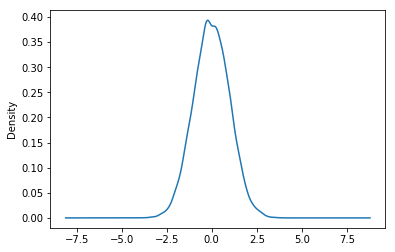

In [215]:
dataframe.median_house_value.plot(kind='density')

**Notice how density curve is normalized. It is showing perfect condition of Gaussian distribution  with an equal number of measurements above and below the mean value.**

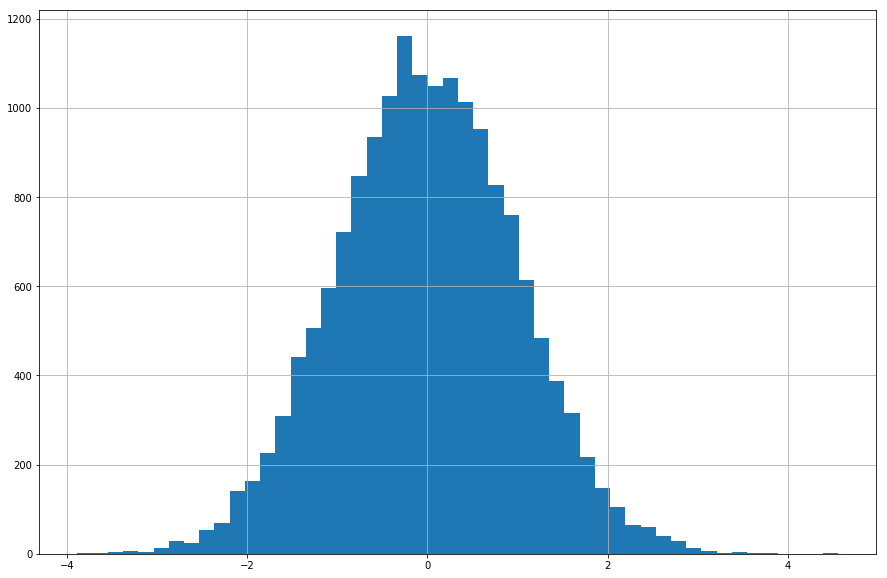

In [216]:
dataframe.median_house_value.hist(bins=50,figsize=(15,10))

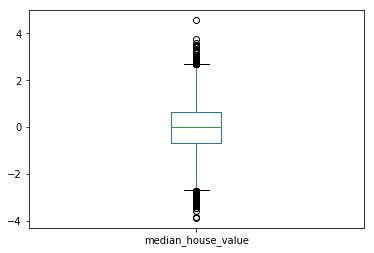

In [217]:
dataframe.median_house_value.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

**The StandardScaler** assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

xi–mean(x)/stdev(x)<br>
If data is not normally distributed, this is not the best scaler to use

## Min-Max Scaler
The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:

xi–min(x)max(x)–min(x)<br>
It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

In [ ]:
#Since we have already used our training dataset. So, we will use original x and y feature set.
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
x_transform = sc_X.fit_transform(x)

In [ ]:
x_transform

In [ ]:
#again we will use dataframe for visualization.
f = np.random.normal(size=[20640,9]) 

In [ ]:
df_transform=pd.DataFrame(f, columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'])

In [ ]:
df_transform.head()

In [ ]:
df_transform.median_house_value.plot(kind='density')

# Modeling

At this stage, we will divide our dataset into training and test dataset. Some tutorials have cleaned missing values after data is divided. However; it is good practice to deal with missing values and outlier before dividing data. I have not dealt with outlier issue yet. That's for later part

In [79]:
#To make this notebook's output identical at every run
#we are going to set a seed for random number.we will use random numbers and these random are kind of pseudo random numbers 
#if the said seed is same the random number will always be the same. So if two users set the same seed, they will get the 
#same random number.
#in short, seed is the basis on which the random number is generated
np.random.seed(42)

In [195]:
# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df.drop('median_house_value', 1)
y = df.median_house_value

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)
# this random state will avoid sample bias.
# Also using 80% , 20% divide is common in literature. There is no rule for this though.

In [198]:
x_train.shape

(16512, 12)

In [199]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20046,-119.01,36.06,25.0,1505.0,537.870553,1392.0,359.0,1.6812,1.0,0.0,0.0,0.0
3024,-119.46,35.14,30.0,2943.0,537.870553,1565.0,584.0,2.5313,1.0,0.0,0.0,0.0
15663,-122.44,37.80,52.0,3830.0,537.870553,1310.0,963.0,3.4801,0.0,0.0,1.0,0.0
20484,-118.72,34.28,17.0,3051.0,537.870553,1705.0,495.0,5.7376,0.0,0.0,0.0,0.0
9814,-121.93,36.62,34.0,2351.0,537.870553,1063.0,428.0,3.7250,0.0,0.0,0.0,1.0


In [200]:
x_test.shape

(4128, 12)

In [205]:
y_test.shape

(4128,)

In [204]:
y_train.shape

(16512,)